# Data Understanding and Visualization
### Verify Dataset


In [ ]:
import os
# Define dataset path
train_dir = "/content/drive/MyDrive/FruitinAmazon/FruitinAmazon/train"
# Get class names (subdirectories)
class_names = sorted(os.listdir(train_dir))
if not class_names:
  print("No class directories found in the train folder!")
else:
  print(f"Found {len(class_names)} classes: {class_names}")

Found 6 classes: ['acai', 'cupuacu', 'graviola', 'guarana', 'pupunha', 'tucuma']


### Check for corrupted images

In [ ]:
from PIL import Image, UnidentifiedImageError
corrupted_images = [] # List to store corrupted images path
# Loop through each class folder and check for corrupted images
for class_name in class_names:
  class_path = os.path.join(train_dir, class_name)
  if os.path.isdir(class_path): # Ensure it's a valid directory
    images = os.listdir(class_path)
    for img_name in images:
      img_path = os.path.join(class_path, img_name)
      try:
          with Image.open(img_path) as img:
            img.verify() # Verify image integrity
      except (IOError, UnidentifiedImageError):
          corrupted_images.append(img_path)

# Print results
if corrupted_images:
  print("\nCorrupted Images Found:")
  for img in corrupted_images:
    print(img)
else:
  print("\nNo corrupted images found.")


No corrupted images found.


### Count class balance

In [ ]:
# Dictionary to store class counts
class_counts = {}
for class_name in class_names:
  class_path = os.path.join(train_dir, class_name)
  if os.path.isdir(class_path):
    images = [img for img in os.listdir(class_path) if img.lower().endswith(('.png', '.jpg'
              , '.jpeg'))]
    class_counts[class_name] = len(images) # Count images in each class
# Print Class Balance
print("\nClass Distribution:")
print("=" * 45)
print(f"{'Class Name':<25}{'Valid Image Count':>15}")
print("=" * 45)
for class_name, count in class_counts.items():
  print(f"{class_name:<25}{count:>15}")
print("=" * 45)


Class Distribution:
Class Name               Valid Image Count
acai                                  15
cupuacu                               15
graviola                              15
guarana                               15
pupunha                               15
tucuma                                15


### Selecting random images for visualization

In [ ]:
import random
selected_images = [] # Store image paths
selected_labels = [] # Store corresponding class names
for class_name in class_names:
  class_path = os.path.join(train_dir, class_name)
  if os.path.isdir(class_path):
    images = [img for img in os.listdir(class_path) if img.lower().endswith(('.png', '.jpg'
, '.jpeg'))]
    if images: # Ensure the class folder is not empty
      selected_img = os.path.join(class_path, random.choice(images))
      selected_images.append(selected_img)
      selected_labels.append(class_name)

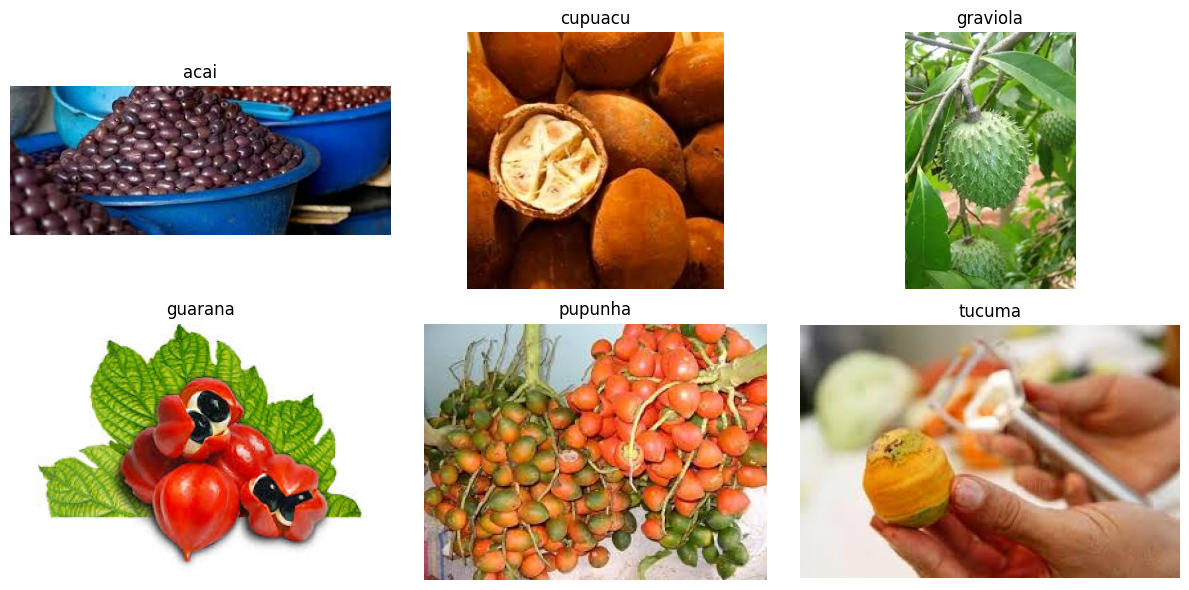

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
# Determine grid size
num_classes = len(selected_images)
cols = (num_classes + 1) // 2 # Determine columns
rows = 2 # Fixed rows for layout
fig, axes = plt.subplots(rows, cols, figsize=(12, 6))
for i, ax in enumerate(axes.flat):
  if i < num_classes:
    img = mpimg.imread(selected_images[i])
    ax.imshow(img)
    ax.set_title(selected_labels[i])
    ax.axis("off")
  else:
    ax.axis("off") # Hide empty subplots
plt.tight_layout()

# Week 6

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import numpy as np
import os
import random
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from PIL import Image


# Define paths
train_dir = '/content/drive/MyDrive/FruitinAmazon/FruitinAmazon/train'
test_dir = '/content/drive/MyDrive/FruitinAmazon/FruitinAmazon/test'


def visualize_data(train_data_dir):
    # Get the list of class directories
    class_dirs = [d for d in os.listdir(train_data_dir) ]
    print(class_dirs)

    # Select one image randomly from each class
    images = []
    labels = []
    for class_dir in class_dirs:
        class_path = os.path.join(train_data_dir, class_dir)
        image_files = [f for f in os.listdir(class_path) if os.path.isfile(os.path.join(class_path, f))]
        random_image_file = random.choice(image_files)
        image_path = os.path.join(class_path, random_image_file)
        images.append(plt.imread(image_path))
        labels.append(class_dir)

    # Display the images in a grid format with two rows using matplotlib
    fig, axes = plt.subplots(2, len(class_dirs) // 2, figsize=(12, 6))
    for i, (image, label) in enumerate(zip(images, labels)):
        row = i // (len(class_dirs) // 2)
        col = i % (len(class_dirs) // 2)
        axes[row, col].imshow(image)
        axes[row, col].set_title(label)
        axes[row, col].axis('off')

    plt.tight_layout()
    plt.show()


['guarana', 'cupuacu', 'acai', 'graviola', 'tucuma', 'pupunha']


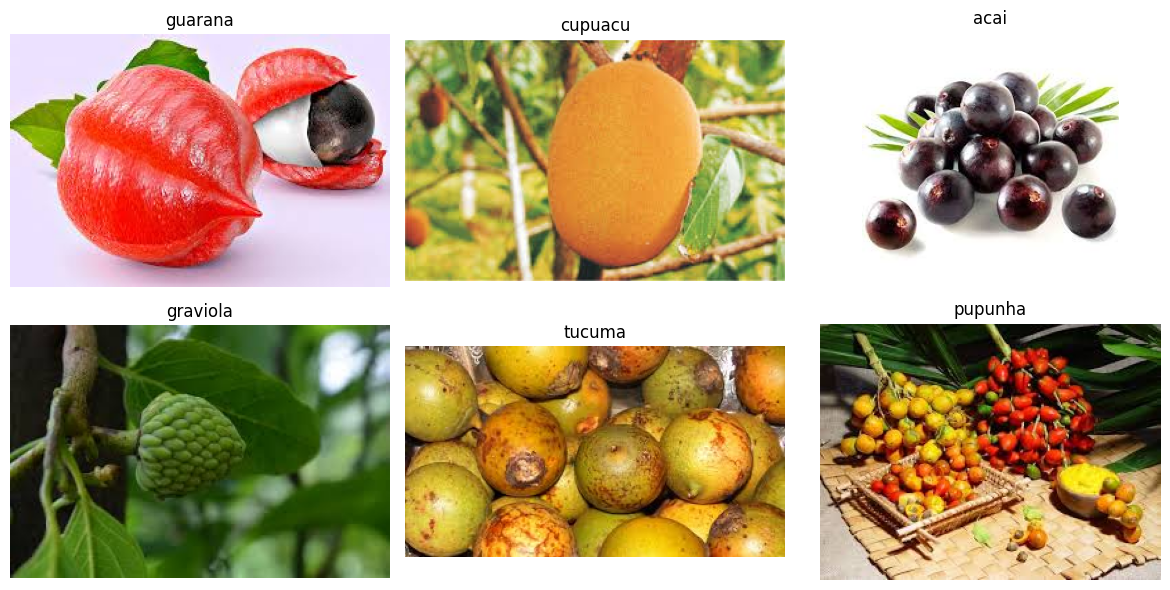

In [ ]:
visualize_data(train_dir)

### Corrupted Image

In [ ]:
import os
from PIL import Image

def check_and_remove_corrupted_images(train_folder):
    corrupted_images = []
    for class_dir in os.listdir(train_folder):
        class_path = os.path.join(train_folder, class_dir)
        if os.path.isdir(class_path):
            for image_file in os.listdir(class_path):
                image_path = os.path.join(class_path, image_file)
                try:
                    with Image.open(image_path) as img:
                        # Verify image format
                        img.verify()
                except (IOError, SyntaxError) as e:
                    corrupted_images.append(image_path)
                    os.remove(image_path)
                    print(f"Removed corrupted image: {image_path}")

    if not corrupted_images:
        print("No corrupted images found.")
    else:
        print(f"Total corrupted images removed: {len(corrupted_images)}")


check_and_remove_corrupted_images(train_dir)

No corrupted images found.


In [ ]:
import tensorflow as tf
# Define image size and batch size
img_height = 128
img_width = 128
batch_size = 32
validation_split = 0.2  # 80% training, 20% validation

# Create a preprocessing layer for normalization
rescale = tf.keras.layers.Rescaling(1./255)  # Normalize pixel values to [0, 1]

# Create training dataset with normalization
train_ds = tf.keras.utils.image_dataset_from_directory(
    train_dir,
    labels='inferred',
    label_mode='int',
    image_size=(img_height, img_width),
    interpolation='nearest',
    batch_size=batch_size,
    shuffle=True,
    validation_split=validation_split,
    subset='training',
    seed=123
)

# Apply the normalization (Rescaling) to the dataset
train_ds = train_ds.map(lambda x, y: (rescale(x), y))

# Create validation dataset with normalization
val_ds = tf.keras.utils.image_dataset_from_directory(
    train_dir,
    labels='inferred',
    label_mode='int',
    image_size=(img_height, img_width),
    interpolation='nearest',
    batch_size=batch_size,
    shuffle=False,
    validation_split=validation_split,
    subset='validation',
    seed=123
)

# Apply the normalization (Rescaling) to the validation dataset
val_ds = val_ds.map(lambda x, y: (rescale(x), y))

Found 90 files belonging to 6 classes.
Using 72 files for training.
Found 90 files belonging to 6 classes.
Using 18 files for validation.


In [ ]:

model = tf.keras.models.Sequential([
      tf.keras.layers.Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(img_height, img_width, 3)),
      tf.keras.layers.MaxPooling2D((2, 2)),
      tf.keras.layers.Conv2D(32, (3, 3), activation='relu', padding='same'),
      tf.keras.layers.MaxPooling2D((2, 2)),
      tf.keras.layers.Flatten(),
      tf.keras.layers.Dense(64, activation='relu'),
      tf.keras.layers.Dense(128, activation='relu'),
      tf.keras.layers.Dense(6, activation='softmax') # 6 for 6 classes of fruits
])
model.summary()

Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_16 (Conv2D)                   │ (None, 128, 128, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_16 (MaxPooling2D)      │ (None, 64, 64, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_17 (Conv2D)                   │ (None, 64, 64, 32)          │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_17 (MaxPooling2D)      │ (None, 32, 32, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_6 (Flatten)                  │ (None, 32768)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_30 (Dense)                     │ (None, 64)                  │       2,097,216 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_31 (Dense)                     │ (None, 128)                 │           8,320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_32 (Dense)                     │ (None, 6)                   │             774 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,116,454 (8.07 MB)

 Trainable params: 2,116,454 (8.07 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model.compile(optimizer='adam',
                loss='sparse_categorical_crossentropy',
                metrics=['accuracy'])

model.summary()

Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_16 (Conv2D)                   │ (None, 128, 128, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_16 (MaxPooling2D)      │ (None, 64, 64, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_17 (Conv2D)                   │ (None, 64, 64, 32)          │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_17 (MaxPooling2D)      │ (None, 32, 32, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_6 (Flatten)                  │ (None, 32768)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_30 (Dense)                     │ (None, 64)                  │       2,097,216 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_31 (Dense)                     │ (None, 128)                 │           8,320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_32 (Dense)                     │ (None, 6)                   │             774 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,116,454 (8.07 MB)

 Trainable params: 2,116,454 (8.07 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

# Define callbacks
callbacks = [
    ModelCheckpoint('best_model.h5', monitor='val_loss', save_best_only=True, mode='min', verbose=1),
    EarlyStopping(monitor='val_loss', patience=10, verbose=1, restore_best_weights=True)
]

# Train the model
history = model.fit(
    train_ds,
    epochs=250,
    batch_size=16,
    validation_data=val_ds,  # Use val_ds for validation
    callbacks=callbacks  # Use callbacks
)

Epoch 1/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 392ms/step - accuracy: 0.1047 - loss: 1.9895
Epoch 1: val_loss improved from inf to 1.11719, saving model to best_model.h5


3/3 ━━━━━━━━━━━━━━━━━━━━ 4s 657ms/step - accuracy: 0.1063 - loss: 2.0175 - val_accuracy: 0.8889 - val_loss: 1.1172
Epoch 2/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 357ms/step - accuracy: 0.1979 - loss: 1.6565
Epoch 2: val_loss did not improve from 1.11719
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 528ms/step - accuracy: 0.2109 - loss: 1.6506 - val_accuracy: 0.6667 - val_loss: 1.5901
Epoch 3/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 620ms/step - accuracy: 0.3524 - loss: 1.5483
Epoch 3: val_loss did not improve from 1.11719
3/3 ━━━━━━━━━━━━━━━━━━━━ 3s 797ms/step - accuracy: 0.3685 - loss: 1.5397 - val_accuracy: 0.5556 - val_loss: 1.3405
Epoch 4/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 575ms/step - accuracy: 0.4988 - loss: 1.3213
Epoch 4: val_loss improved from 1.11719 to 1.09653, saving model to best_model.h5


3/3 ━━━━━━━━━━━━━━━━━━━━ 3s 745ms/step - accuracy: 0.5061 - loss: 1.3086 - val_accuracy: 0.6111 - val_loss: 1.0965
Epoch 5/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 365ms/step - accuracy: 0.6238 - loss: 1.0580
Epoch 5: val_loss improved from 1.09653 to 0.83711, saving model to best_model.h5


3/3 ━━━━━━━━━━━━━━━━━━━━ 4s 595ms/step - accuracy: 0.6311 - loss: 1.0579 - val_accuracy: 0.7778 - val_loss: 0.8371
Epoch 6/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 366ms/step - accuracy: 0.7494 - loss: 0.7918
Epoch 6: val_loss did not improve from 0.83711
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 536ms/step - accuracy: 0.7530 - loss: 0.7925 - val_accuracy: 0.7222 - val_loss: 0.9100
Epoch 7/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 366ms/step - accuracy: 0.8854 - loss: 0.5512
Epoch 7: val_loss improved from 0.83711 to 0.63513, saving model to best_model.h5


3/3 ━━━━━━━━━━━━━━━━━━━━ 3s 540ms/step - accuracy: 0.8828 - loss: 0.5548 - val_accuracy: 0.8333 - val_loss: 0.6351
Epoch 8/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 635ms/step - accuracy: 0.9601 - loss: 0.3700
Epoch 8: val_loss improved from 0.63513 to 0.54494, saving model to best_model.h5


3/3 ━━━━━━━━━━━━━━━━━━━━ 4s 882ms/step - accuracy: 0.9596 - loss: 0.3697 - val_accuracy: 0.8333 - val_loss: 0.5449
Epoch 9/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 737ms/step - accuracy: 0.9803 - loss: 0.2210
Epoch 9: val_loss improved from 0.54494 to 0.52579, saving model to best_model.h5


3/3 ━━━━━━━━━━━━━━━━━━━━ 5s 996ms/step - accuracy: 0.9783 - loss: 0.2252 - val_accuracy: 0.8333 - val_loss: 0.5258
Epoch 10/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 845ms/step - accuracy: 1.0000 - loss: 0.1368
Epoch 10: val_loss improved from 0.52579 to 0.41020, saving model to best_model.h5


3/3 ━━━━━━━━━━━━━━━━━━━━ 6s 1s/step - accuracy: 1.0000 - loss: 0.1359 - val_accuracy: 0.8333 - val_loss: 0.4102
Epoch 11/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 710ms/step - accuracy: 1.0000 - loss: 0.1167
Epoch 11: val_loss did not improve from 0.41020
3/3 ━━━━━━━━━━━━━━━━━━━━ 3s 866ms/step - accuracy: 1.0000 - loss: 0.1111 - val_accuracy: 0.8333 - val_loss: 0.6145
Epoch 12/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 409ms/step - accuracy: 0.9797 - loss: 0.0681
Epoch 12: val_loss did not improve from 0.41020
3/3 ━━━━━━━━━━━━━━━━━━━━ 3s 580ms/step - accuracy: 0.9813 - loss: 0.0661 - val_accuracy: 0.8333 - val_loss: 0.6074
Epoch 13/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 386ms/step - accuracy: 1.0000 - loss: 0.0180
Epoch 13: val_loss did not improve from 0.41020
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 557ms/step - accuracy: 1.0000 - loss: 0.0179 - val_accuracy: 0.8333 - val_loss: 0.5239
Epoch 14/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 396ms/step - accuracy: 1.0000 - loss: 0.0097
Epoch 14: val_loss did not improve from 0.41020
3/3 ━━━

In [ ]:
# Create test dataset with normalization
test_ds = tf.keras.utils.image_dataset_from_directory(
    test_dir,
    labels='inferred',
    label_mode='int',
    image_size=(img_height, img_width),
    interpolation='nearest',
    batch_size=batch_size,
    shuffle=False  # Important to keep test data in original order
)

# Apply the normalization (Rescaling) to the test dataset
test_ds = test_ds.map(lambda x, y: (rescale(x), y))

Found 30 files belonging to 6 classes.


In [ ]:
# Evaluate the model on the test dataset
loss, accuracy = model.evaluate(test_ds)

print('Test Loss:', loss)
print('Test Accuracy:', accuracy)

1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step - accuracy: 0.7000 - loss: 0.8879
Test Loss: 0.8878724575042725
Test Accuracy: 0.699999988079071


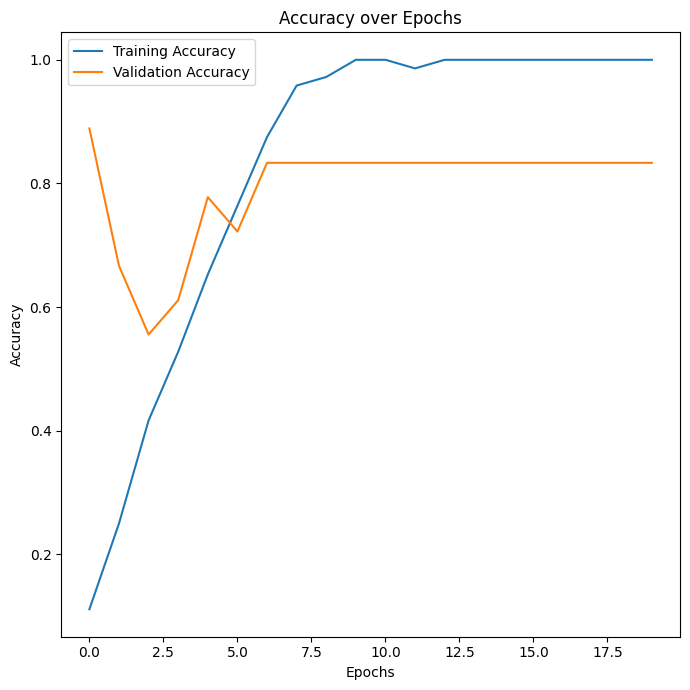

In [ ]:
# Plot training and validation accuracy
plt.figure(figsize=(7, 7))
# Accuracy plot

plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

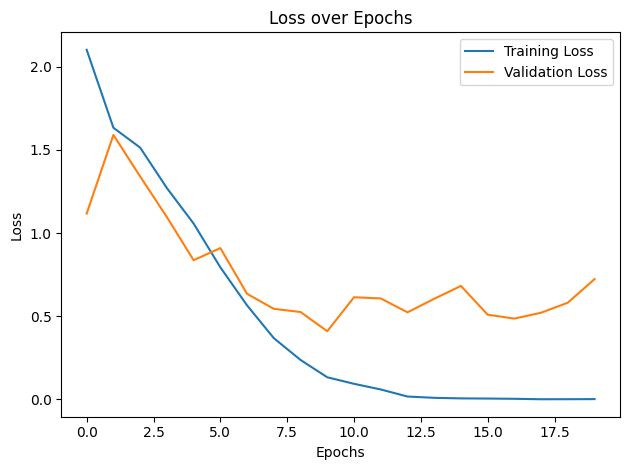

In [ ]:
# Loss plot
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

## Task 1

In [ ]:
data_augmentation_layers = [
  layers.RandomFlip("horizontal"),
  layers.RandomRotation(0.1),
]

def data_augmentation(images):
  for layer in data_augmentation_layers:
    images = layer(images)
  return images

In [ ]:
# Define an improved CNN model with Batch Normalization and Dropout
modelcnn2 = keras.Sequential([

    # Data augmentation applied using Lambda layer
    layers.Lambda(data_augmentation, input_shape=(128,128, 3)),

    # Rescaling layer to normalize pixel values
    layers.Rescaling(1./255),

    layers.Conv2D(32, (3, 3), activation="relu", padding="same"),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),
    layers.Dropout(0.2),

    layers.Conv2D(64, (3, 3), activation="relu", padding="same"),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),
    layers.Dropout(0.3),

    layers.Conv2D(128, (3, 3), activation="relu", padding="same"),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),
    layers.Dropout(0.4),

    layers.Flatten(),
    layers.Dense(256, activation="relu"),
    layers.BatchNormalization(),
    layers.Dropout(0.5),
    layers.Dense(6, activation="softmax")
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/lambda_layer.py:65: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [ ]:
# Compile the model
modelcnn2.compile(
    optimizer="adam",
    loss="sparse_categorical_crossentropy",
    metrics=["accuracy"]
)

In [ ]:
# Display model summary
modelcnn2.summary()

Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lambda_2 (Lambda)                    │ (None, 128, 128, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ rescaling_4 (Rescaling)              │ (None, 128, 128, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_18 (Conv2D)                   │ (None, 128, 128, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_16               │ (None, 128, 128, 32)        │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_18 (MaxPooling2D)      │ (None, 64, 64, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_16 (Dropout)                 │ (None, 64, 64, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_19 (Conv2D)                   │ (None, 64, 64, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_17               │ (None, 64, 64, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_19 (MaxPooling2D)      │ (None, 32, 32, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_17 (Dropout)                 │ (None, 32, 32, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_20 (Conv2D)                   │ (None, 32, 32, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_18               │ (None, 32, 32, 128)         │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_20 (MaxPooling2D)      │ (None, 16, 16, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_18 (Dropout)                 │ (None, 16, 16, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_7 (Flatten)                  │ (None, 32768)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_33 (Dense)                     │ (None, 256)                 │       8,388,864 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_19               │ (None, 256)                 │           1,024 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_19 (Dropout)                 │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_34 (Dense)                     │ (None, 6)                   │           1,542 │
└──────────────────────────────────────┴─────────────────────────────┴──────────────

 Total params: 8,485,574 (32.37 MB)

 Trainable params: 8,484,614 (32.37 MB)

 Non-trainable params: 960 (3.75 KB)

In [ ]:
# Train the model
cnn_history = modelcnn2.fit(
    train_ds,  # Training dataset
    validation_data=val_ds,  # Validation dataset
    epochs=250,  # Number of epochs
    batch_size=32,  # Batch size
    callbacks=callbacks  # Callbacks for early stopping and saving the best model
    # jit_compile =False # Remove this line - it's not a valid argument for model.fit
)

Epoch 1/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.2037 - loss: 2.8597
Epoch 1: val_loss did not improve from 0.41020
3/3 ━━━━━━━━━━━━━━━━━━━━ 12s 3s/step - accuracy: 0.2118 - loss: 2.8201 - val_accuracy: 0.0000e+00 - val_loss: 1.8145
Epoch 2/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.5446 - loss: 1.8087
Epoch 2: val_loss did not improve from 0.41020
3/3 ━━━━━━━━━━━━━━━━━━━━ 5s 2s/step - accuracy: 0.5473 - loss: 1.7946 - val_accuracy: 0.0000e+00 - val_loss: 1.8687
Epoch 3/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.5498 - loss: 1.3273
Epoch 3: val_loss did not improve from 0.41020
3/3 ━━━━━━━━━━━━━━━━━━━━ 5s 2s/step - accuracy: 0.5512 - loss: 1.3175 - val_accuracy: 0.0000e+00 - val_loss: 1.9497
Epoch 4/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.6817 - loss: 0.9390
Epoch 4: val_loss did not improve from 0.41020
3/3 ━━━━━━━━━━━━━━━━━━━━ 11s 2s/step - accuracy: 0.6710 - loss: 0.9786 - val_accuracy: 0.0000e+00 - val_loss: 1.9328
Epoch 5/250
3/3 ━━

In [ ]:
test_ds = tf.keras.preprocessing.image_dataset_from_directory(
    test_dir,
    labels='inferred',
    label_mode='int',
    image_size=(img_height, img_width),
    interpolation='nearest',
    batch_size=batch_size,
    shuffle=False,              # No shuffling for consistent evaluation
)

# Apply the same normalization as train/val
test_ds = test_ds.map(lambda x, y: (rescale(x), y))

# Evaluate the model on the test dataset
test_loss, test_accuracy = modelcnn2.evaluate(test_ds)
print(f"\n\nTest Loss: {test_loss:.4f}, Test Accuracy: {test_accuracy:.4f}")

Found 30 files belonging to 6 classes.
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 554ms/step - accuracy: 0.1667 - loss: 2.5459


Test Loss: 2.5459, Test Accuracy: 0.1667


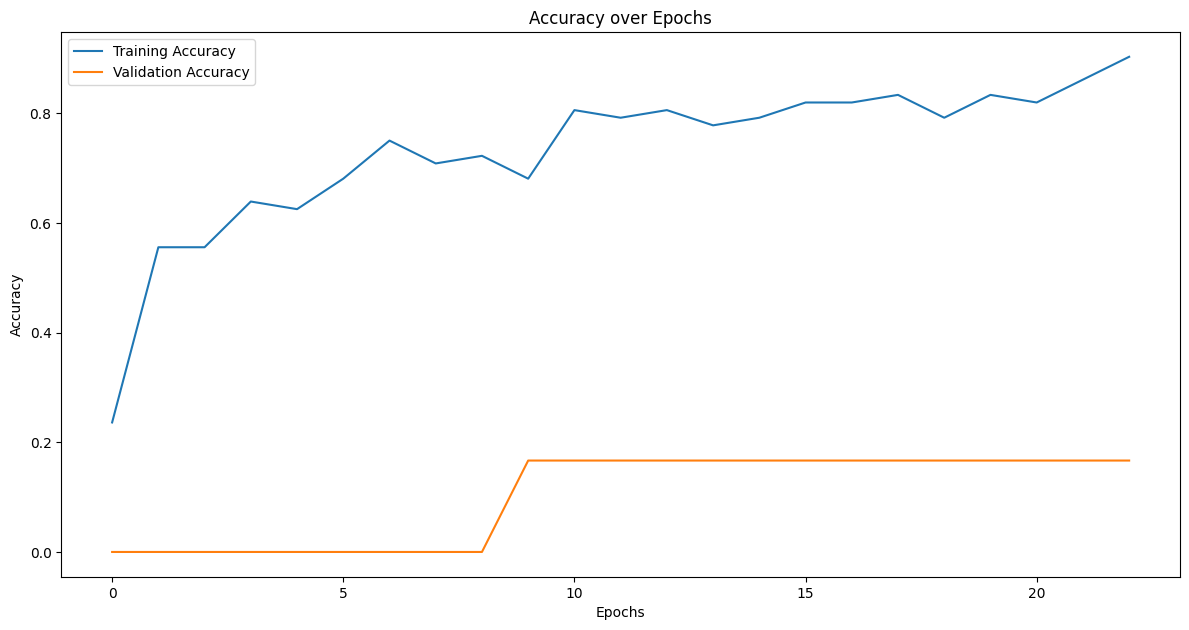

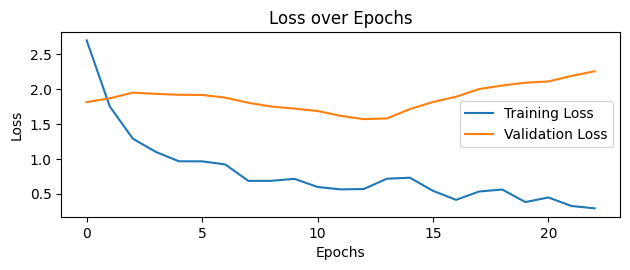

In [ ]:
# Plot training and validation accuracy
plt.figure(figsize=(12, 12))

# Accuracy plot
plt.subplot(2, 1, 1)
plt.plot(cnn_history.history['accuracy'], label='Training Accuracy')
plt.plot(cnn_history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

# Loss plot
plt.subplot(2, 1, 2)
plt.plot(cnn_history.history['loss'], label='Training Loss')
plt.plot(cnn_history.history['val_loss'], label='Validation Loss')
plt.title('Loss over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

### MobilenetV2

In [ ]:
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout, Input

# Define input shape
input_shape = (128, 128, 3)
base_model = MobileNetV2(input_shape=input_shape, include_top=False, weights='imagenet')

# Freeze the base model
base_model.trainable = False

# Add custom layers on top
inputs = Input(shape=input_shape)
x = base_model(inputs, training=False)
x = GlobalAveragePooling2D()(x)
x = Dropout(0.3)(x)
x = Dense(128, activation='relu')(x)
outputs = Dense(6, activation='softmax')(x)  # Adjust to your number of classes

# Create the model
modelnetv2 = Model(inputs, outputs)

9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
from tensorflow.keras.optimizers import Adam

modelnetv2.compile(
    optimizer=Adam(),
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

In [ ]:
vnet2_history = modelnetv2.fit(
    train_ds,
    validation_data=val_ds,
    epochs=250,
    batch_size=16,
    callbacks=callbacks
)

Epoch 1/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 354ms/step - accuracy: 0.0637 - loss: 2.4229
Epoch 1: val_loss did not improve from 0.41020
3/3 ━━━━━━━━━━━━━━━━━━━━ 11s 1s/step - accuracy: 0.0720 - loss: 2.3957 - val_accuracy: 0.3889 - val_loss: 1.5245
Epoch 2/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 237ms/step - accuracy: 0.5683 - loss: 1.0768
Epoch 2: val_loss did not improve from 0.41020
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 414ms/step - accuracy: 0.5790 - loss: 1.0538 - val_accuracy: 0.8333 - val_loss: 0.7664
Epoch 3/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 225ms/step - accuracy: 0.9410 - loss: 0.3559
Epoch 3: val_loss did not improve from 0.41020
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 422ms/step - accuracy: 0.9349 - loss: 0.3616 - val_accuracy: 0.8889 - val_loss: 0.4578
Epoch 4/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 227ms/step - accuracy: 0.9497 - loss: 0.2180
Epoch 4: val_loss improved from 0.41020 to 0.32584, saving model to best_model.h5


3/3 ━━━━━━━━━━━━━━━━━━━━ 3s 556ms/step - accuracy: 0.9518 - loss: 0.2165 - val_accuracy: 0.9444 - val_loss: 0.3258
Epoch 5/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 228ms/step - accuracy: 1.0000 - loss: 0.0882
Epoch 5: val_loss did not improve from 0.32584
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 400ms/step - accuracy: 1.0000 - loss: 0.0889 - val_accuracy: 0.9444 - val_loss: 0.3847
Epoch 6/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 392ms/step - accuracy: 1.0000 - loss: 0.0615
Epoch 6: val_loss did not improve from 0.32584
3/3 ━━━━━━━━━━━━━━━━━━━━ 3s 631ms/step - accuracy: 1.0000 - loss: 0.0601 - val_accuracy: 0.9444 - val_loss: 0.4125
Epoch 7/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 219ms/step - accuracy: 1.0000 - loss: 0.0355
Epoch 7: val_loss did not improve from 0.32584
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 384ms/step - accuracy: 1.0000 - loss: 0.0376 - val_accuracy: 0.9444 - val_loss: 0.3813
Epoch 8/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 238ms/step - accuracy: 1.0000 - loss: 0.0475
Epoch 8: val_loss improved from 0.32584 to 0.30947, saving 

3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 532ms/step - accuracy: 1.0000 - loss: 0.0456 - val_accuracy: 0.9444 - val_loss: 0.3095
Epoch 9/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 219ms/step - accuracy: 1.0000 - loss: 0.0222
Epoch 9: val_loss improved from 0.30947 to 0.27812, saving model to best_model.h5


3/3 ━━━━━━━━━━━━━━━━━━━━ 3s 537ms/step - accuracy: 1.0000 - loss: 0.0218 - val_accuracy: 0.9444 - val_loss: 0.2781
Epoch 10/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 230ms/step - accuracy: 1.0000 - loss: 0.0190
Epoch 10: val_loss improved from 0.27812 to 0.26555, saving model to best_model.h5


3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 560ms/step - accuracy: 1.0000 - loss: 0.0187 - val_accuracy: 0.9444 - val_loss: 0.2656
Epoch 11/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 273ms/step - accuracy: 1.0000 - loss: 0.0096
Epoch 11: val_loss improved from 0.26555 to 0.26268, saving model to best_model.h5


3/3 ━━━━━━━━━━━━━━━━━━━━ 3s 597ms/step - accuracy: 1.0000 - loss: 0.0096 - val_accuracy: 0.9444 - val_loss: 0.2627
Epoch 12/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 400ms/step - accuracy: 1.0000 - loss: 0.0123
Epoch 12: val_loss did not improve from 0.26268
3/3 ━━━━━━━━━━━━━━━━━━━━ 3s 745ms/step - accuracy: 1.0000 - loss: 0.0118 - val_accuracy: 0.9444 - val_loss: 0.2639
Epoch 13/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 385ms/step - accuracy: 1.0000 - loss: 0.0059
Epoch 13: val_loss did not improve from 0.26268
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 556ms/step - accuracy: 1.0000 - loss: 0.0058 - val_accuracy: 0.9444 - val_loss: 0.2675
Epoch 14/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 225ms/step - accuracy: 1.0000 - loss: 0.0069
Epoch 14: val_loss did not improve from 0.26268
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 373ms/step - accuracy: 1.0000 - loss: 0.0069 - val_accuracy: 0.9444 - val_loss: 0.2748
Epoch 15/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 226ms/step - accuracy: 1.0000 - loss: 0.0050
Epoch 15: val_loss did not improve from 0.26268
3/3 

In [ ]:
modelnetv2.summary()

Model: "functional_12"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_10 (InputLayer)          │ (None, 128, 128, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ mobilenetv2_1.00_128 (Functional)    │ (None, 4, 4, 1280)          │       2,257,984 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling2d_4           │ (None, 1280)                │               0 │
│ (GlobalAveragePooling2D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_20 (Dropout)                 │ (None, 1280)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_35 (Dense)                     │ (None, 128)                 │         163,968 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_36 (Dense)                     │ (None, 6)                   │             774 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,752,212 (10.50 MB)

 Trainable params: 164,742 (643.52 KB)

 Non-trainable params: 2,257,984 (8.61 MB)

 Optimizer params: 329,486 (1.26 MB)

In [ ]:
test_ds = tf.keras.preprocessing.image_dataset_from_directory(
    test_dir,
    labels='inferred',
    label_mode='int',
    image_size=(img_height, img_width),
    interpolation='nearest',
    batch_size=batch_size,
    shuffle=False,              # No shuffling for consistent evaluation
)

# Apply the same normalization as train/val
test_ds = test_ds.map(lambda x, y: (rescale(x), y))

# Evaluate the model on the test dataset
test_loss, test_accuracy = modelnetv2.evaluate(test_ds)
print(f"\n\nTest Loss: {test_loss:.4f}, Test Accuracy: {test_accuracy:.4f}")

Found 30 files belonging to 6 classes.
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 485ms/step - accuracy: 0.8000 - loss: 0.5658


Test Loss: 0.5658, Test Accuracy: 0.8000


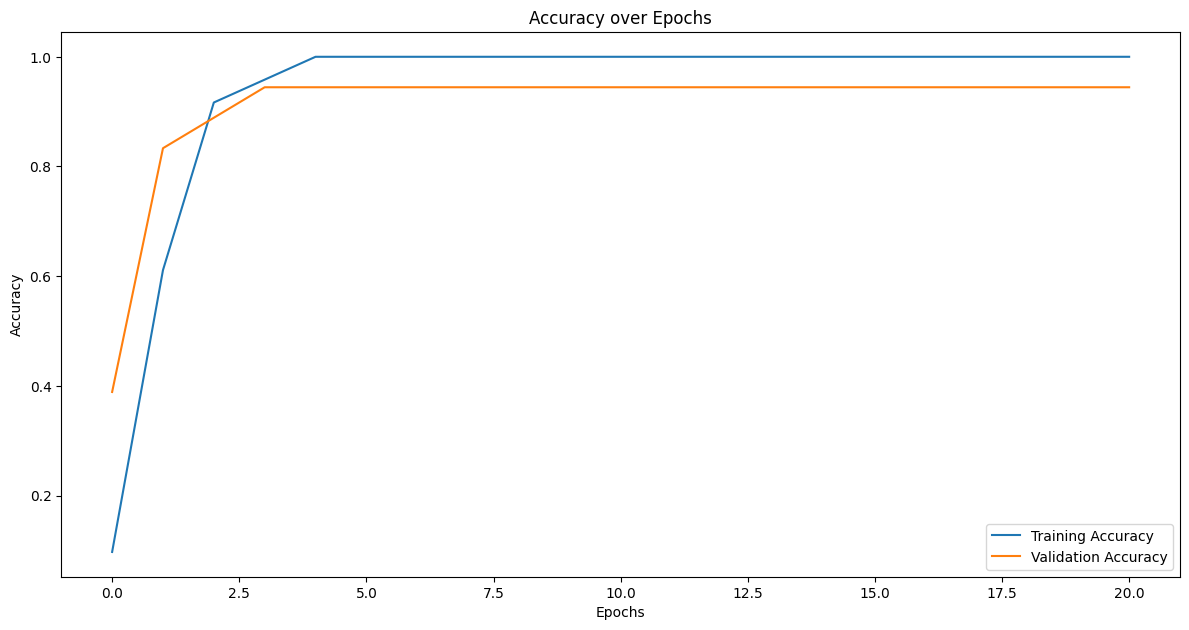

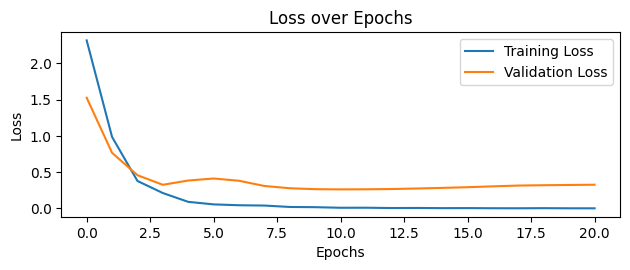

In [ ]:
#  Plot training and validation accuracy
plt.figure(figsize=(12, 12))

# Accuracy plot
plt.subplot(2, 1, 1)
plt.plot(vnet2_history.history['accuracy'], label='Training Accuracy')
plt.plot(vnet2_history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

# Loss plot
plt.subplot(2, 1, 2)
plt.plot(vnet2_history.history['loss'], label='Training Loss')
plt.plot(vnet2_history.history['val_loss'], label='Validation Loss')
plt.title('Loss over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

### VGG16

In [ ]:
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout, Input

In [ ]:
# Load the VGG16 model pre-trained on ImageNet, without the top classification layer
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(128,128, 3))

In [ ]:
for layer in base_model.layers:
  layer.trainable = False



# Add custom layers on top of the pre-trained model
x = base_model.output
x = GlobalAveragePooling2D()(x) # Reduces dimensions (height, width) to a single vector per image
x = Dense(1024, activation='relu')(x) # Fully connected layer with 1024 neurons
x = Dense(10, activation='softmax')(x) # Output layer for 10 classes (with softmax for multi-class classification)


from tensorflow.keras.models import Model
# Create the final model
modelvgg16 = Model(inputs=base_model.input, outputs=x)

In [ ]:
from tensorflow.keras.optimizers import Adam
# Compile the model
modelvgg16.compile(optimizer=Adam(), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [87]:
vgg_history = modelvgg16.fit(
    train_ds,
    validation_data=val_ds,
    epochs=250,
    batch_size=32,
    callbacks=callbacks
)

Epoch 1/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 4s/step - accuracy: 0.1545 - loss: 2.3419
Epoch 1: val_loss did not improve from 0.26268
3/3 ━━━━━━━━━━━━━━━━━━━━ 23s 7s/step - accuracy: 0.1576 - loss: 2.3146 - val_accuracy: 0.2222 - val_loss: 1.9918
Epoch 2/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 6s/step - accuracy: 0.4606 - loss: 1.5747  
Epoch 2: val_loss did not improve from 0.26268
3/3 ━━━━━━━━━━━━━━━━━━━━ 23s 8s/step - accuracy: 0.4566 - loss: 1.5735 - val_accuracy: 0.5556 - val_loss: 1.6002
Epoch 3/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 4s/step - accuracy: 0.7118 - loss: 1.2699
Epoch 3: val_loss did not improve from 0.26268
3/3 ━━━━━━━━━━━━━━━━━━━━ 21s 6s/step - accuracy: 0.7005 - loss: 1.2667 - val_accuracy: 0.6667 - val_loss: 0.8776
Epoch 4/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 5s/step - accuracy: 0.6852 - loss: 1.1286
Epoch 4: val_loss did not improve from 0.26268
3/3 ━━━━━━━━━━━━━━━━━━━━ 20s 7s/step - accuracy: 0.6840 - loss: 1.1240 - val_accuracy: 0.7222 - val_loss: 0.9482
Epoch 5/250
3/3 ━━━━━━━━━━━━━━

In [89]:
test_ds = tf.keras.preprocessing.image_dataset_from_directory(
    test_dir,
    labels='inferred',
    label_mode='int',
    image_size=(img_height, img_width),
    interpolation='nearest',
    batch_size=batch_size,
    shuffle=False,              # No shuffling for consistent evaluation
)

# Apply the same normalization as train/val
test_ds = test_ds.map(lambda x, y: (rescale(x), y))

# Evaluate the model on the test dataset
test_loss, test_accuracy = modelvgg16.evaluate(test_ds)
print(f"\n\nTest Loss: {test_loss:.4f}, Test Accuracy: {test_accuracy:.4f}")

Found 30 files belonging to 6 classes.
1/1 ━━━━━━━━━━━━━━━━━━━━ 5s 5s/step - accuracy: 0.5000 - loss: 1.4110


Test Loss: 1.4110, Test Accuracy: 0.5000


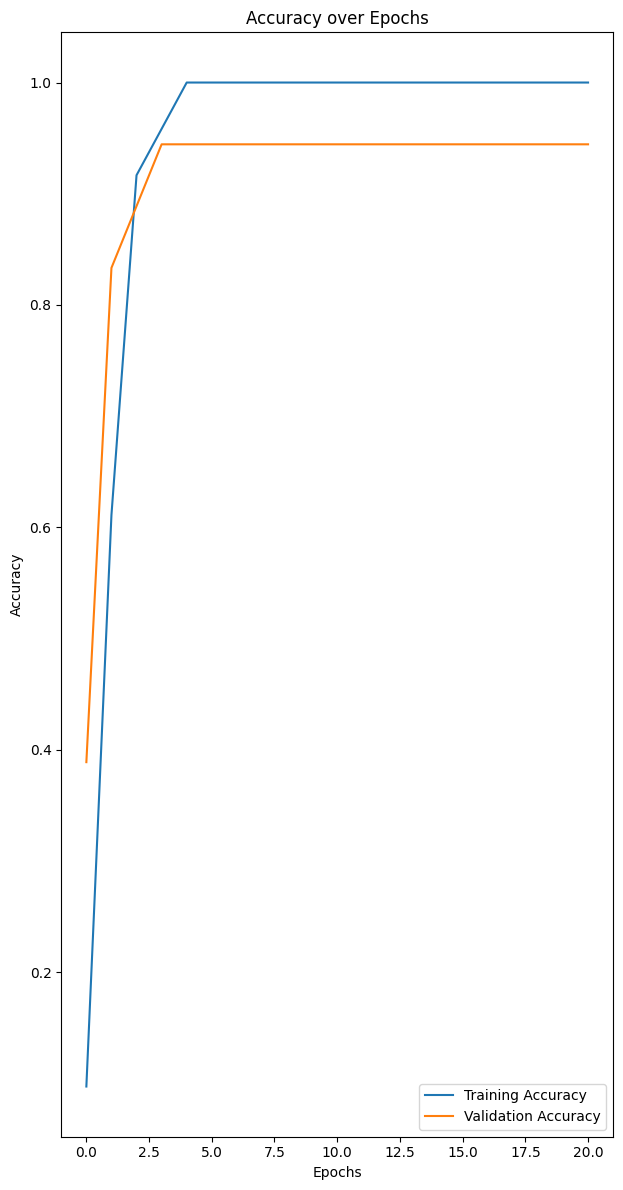

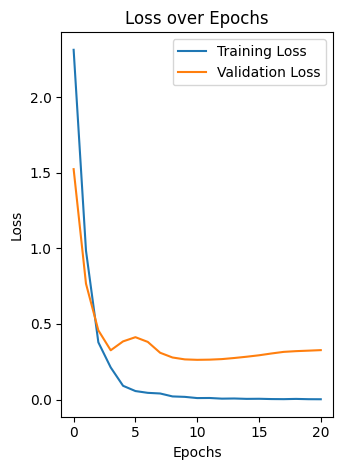

In [90]:
# Plot training and validation accuracy
plt.figure(figsize=(12, 12))

# Accuracy plot
plt.subplot(2, 1, 1)
plt.plot(vnet2_history.history['accuracy'], label='Training Accuracy')
plt.plot(vnet2_history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

# Loss plot
plt.subplot(2, 1, 2)
plt.plot(vnet2_history.history['loss'], label='Training Loss')
plt.plot(vnet2_history.history['val_loss'], label='Validation Loss')
plt.title('Loss over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()